# Unit 6 - Pythonic Monopoly

- Intial Imports

In [23]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import hvplot.pandas
from pathlib import Path
from dotenv import load_dotenv

%matplotlib inline
load_dotenv()


True

- Load Data

In [24]:
mapbox_token = os.getenv("mapbox")

In [25]:
sfo_data = pd.read_csv("neighborhoods_census_data.csv", index_col="year")
sfo_data.head()

,neighborhood,sale_price_sqr_foot,housing_units,gross_rent
year,,,,
2010,Alamo Square,291.182945,372560,1239
2010,Anza Vista,267.932583,372560,1239
2010,Bayview,170.098665,372560,1239
2010,Buena Vista Park,347.394919,372560,1239
2010,Central Richmond,319.027623,372560,1239


## Housing Units Per Year

- Average Housing Units

In [26]:
housing =sfo_data.groupby(["year"])["housing_units"]

In [27]:
average_housing = housing.mean()

In [28]:
average_housing

year
2010    372560
2011    374507
2012    376454
2013    378401
2014    380348
2015    382295
2016    384242
Name: housing_units, dtype: int64

- Plotting the Data

In [29]:
min = average_housing.min()
max = average_housing.max()

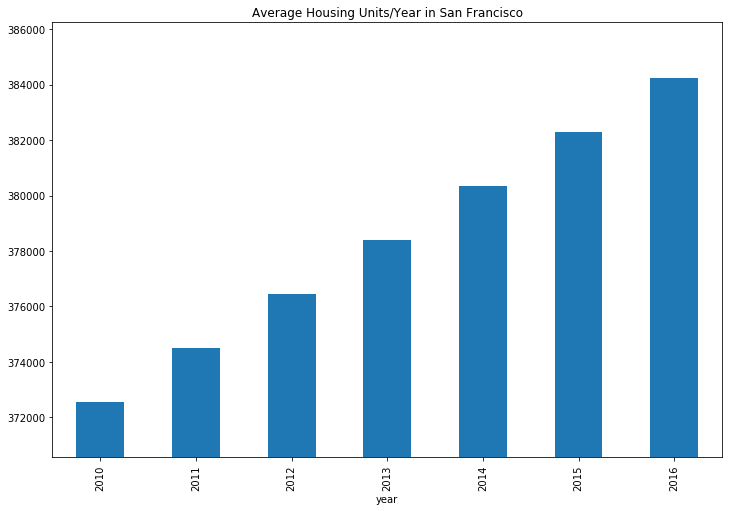

In [30]:
average_housing.plot(kind="bar",ylim =(min-2000,max+2000),title="Average Housing Units/Year in San Francisco", figsize=(12,8))

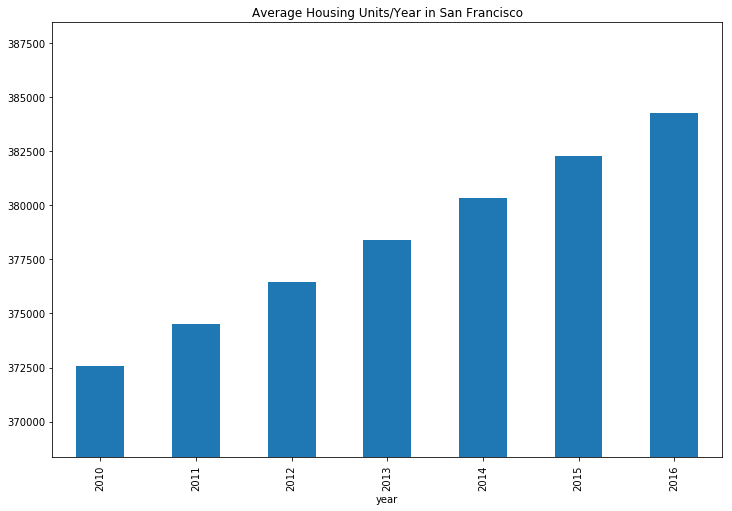

In [31]:
housing_std = average_housing.std()
average_housing.plot(kind="bar",ylim =(min-housing_std,max+housing_std),title="Average Housing Units/Year in San Francisco", figsize=(12,8))

## Average Gross Rent in San Francisco Per Year

In [32]:
avg_gross_rent = sfo_data[["sale_price_sqr_foot", "gross_rent"]].groupby(["year"]).mean()
avg_gross_rent.head()

,sale_price_sqr_foot,gross_rent
year,,
2010,369.344353,1239
2011,341.903429,1530
2012,399.389968,2324
2013,483.600304,2971
2014,556.277273,3528


- Plotting the Data

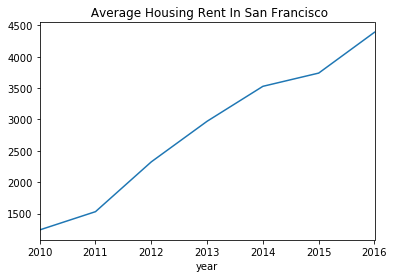

In [33]:
avg_gross_rent["gross_rent"].plot(kind="line", title = " Average Housing Rent In San Francisco")

## Plotting Average Sales Price per Year

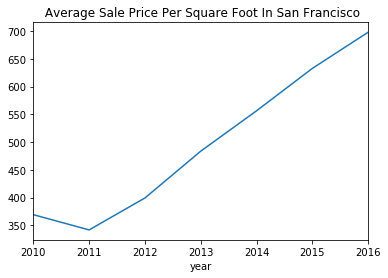

In [34]:
avg_gross_rent["sale_price_sqr_foot"].plot(kind="line", title = " Average Sale Price Per Square Foot In San Francisco")
    

##  Average Prices by Neighborhood

In [35]:
avg_prices_neighbourhood = pd.DataFrame()
avg_prices_neighbourhood = sfo_data.groupby(["year","neighborhood"]).mean()
avg_prices_neighbourhood.reset_index(inplace=True)
avg_prices_neighbourhood.head()

,year,neighborhood,sale_price_sqr_foot,housing_units,gross_rent
0,2010,Alamo Square,291.182945,372560,1239
1,2010,Anza Vista,267.932583,372560,1239
2,2010,Bayview,170.098665,372560,1239
3,2010,Buena Vista Park,347.394919,372560,1239
4,2010,Central Richmond,319.027623,372560,1239


- Plotting the Data

In [36]:
avg_prices_neighbourhood.hvplot.line("year","sale_price_sqr_foot",xlabel="Year",ylabel="Average Sales Prices per Square Foot", groupby="neighborhood")

:DynamicMap   [neighborhood]
   :Curve   [year]   (sale_price_sqr_foot)

##  The Top 10 Most Expensive Neighborhoods

In [37]:
most_expen_neighborhood = pd.DataFrame()
most_expen_neighborhood  = sfo_data.groupby(["neighborhood"]).mean().sort_values("sale_price_sqr_foot",ascending=False)
most_expen_neighborhood= most_expen_neighborhood.reset_index()
top_ten_most_expen_neighborhood=most_expen_neighborhood.head(10)
top_ten_most_expen_neighborhood

,neighborhood,sale_price_sqr_foot,housing_units,gross_rent
0,Union Square District,903.993258,377427.50,2555.166667
1,Merced Heights,788.844818,380348.00,3414.000000
2,Miraloma Park,779.810842,375967.25,2155.250000
3,Pacific Heights,689.555817,378401.00,2817.285714
4,Westwood Park,687.087575,382295.00,3959.000000
5,Telegraph Hill,676.506578,378401.00,2817.285714
6,Presidio Heights,675.350212,378401.00,2817.285714
7,Cow Hollow,665.964042,378401.00,2817.285714
8,Potrero Hill,662.013613,378401.00,2817.285714
9,South Beach,650.124479,375805.00,2099.000000


- Plotting the Data

In [38]:
top_ten_most_expen_neighborhood.hvplot.bar("neighborhood","sale_price_sqr_foot", xlabel="Neighborhood",ylabel="Average Sale Price Per Square Foot")

:Bars   [neighborhood]   (sale_price_sqr_foot)

## Parallel Coordinates and Parallel Categories Analysis

- Parallel Coordinates Plot

In [39]:
px.parallel_coordinates(avg_prices_neighbourhood,color= 'sale_price_sqr_foot', color_continuous_scale=px.colors.sequential.Inferno)


- Parallel Categories Plot

In [40]:
px.parallel_categories(avg_prices_neighbourhood,color="sale_price_sqr_foot", color_continuous_scale=px.colors.sequential.Inferno)


##  Neighborhood Map

-  Load Location Data

In [41]:
df_neighborhood_locations = pd.read_csv("neighborhoods_coordinates.csv")
df_neighborhood_locations.head()

,Neighborhood,Lat,Lon
0,Alamo Square,37.791012,-122.402100
1,Anza Vista,37.779598,-122.443451
2,Bayview,37.734670,-122.401060
3,Bayview Heights,37.728740,-122.410980
4,Bernal Heights,37.728630,-122.443050


In [42]:
average_prices = sfo_data.groupby(["neighborhood"]).mean()
average_prices.reset_index(inplace=True)
average_prices.rename(columns={"neighborhood":'Neighborhood'},inplace=True)
average_prices.head()

,Neighborhood,sale_price_sqr_foot,housing_units,gross_rent
0,Alamo Square,366.020712,378401.0,2817.285714
1,Anza Vista,373.382198,379050.0,3031.833333
2,Bayview,204.588623,376454.0,2318.400000
3,Bayview Heights,590.792839,382295.0,3739.000000
4,Bernal Heights,576.746488,379374.5,3080.333333


- Merging the data

In [43]:
combined_data= pd.merge(average_prices,df_neighborhood_locations,on="Neighborhood")
combined_data.head()

,Neighborhood,sale_price_sqr_foot,housing_units,gross_rent,Lat,Lon
0,Alamo Square,366.020712,378401.0,2817.285714,37.791012,-122.402100
1,Anza Vista,373.382198,379050.0,3031.833333,37.779598,-122.443451
2,Bayview,204.588623,376454.0,2318.400000,37.734670,-122.401060
3,Bayview Heights,590.792839,382295.0,3739.000000,37.728740,-122.410980
4,Buena Vista Park,452.680591,378076.5,2698.833333,37.768160,-122.439330


## Mapbox Visualization

In [44]:
px.set_mapbox_access_token("mapbox_token")
mp_plot= px.scatter_mapbox(combined_data,lat="Lat",lon="Lon",size="sale_price_sqr_foot",color="gross_rent", title="Average Sale Price per Square Foot and Gross Rent in San Francisco")
mp_plot.show()
# There is something worng with px, tried searching for it but unsuccessful